In [2]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


In [4]:
tickerSymbol = 'TSLA'


In [5]:
tickerData = yf.Ticker(tickerSymbol)


In [6]:
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')


In [7]:
tickerDf.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
tickerDf = tickerDf.reset_index()
tickerDf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
tickerDf = tickerDf.drop(['Date', 'Dividends', 'Stock Splits'], axis = 1)
tickerDf.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


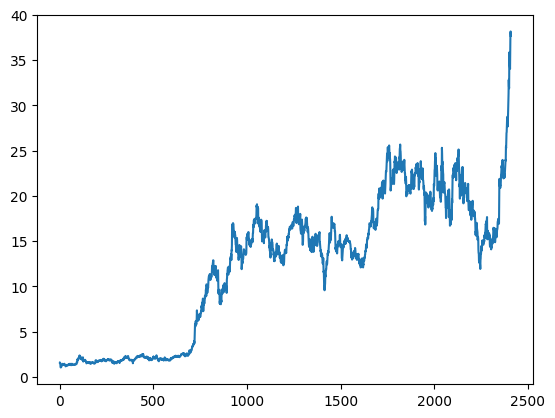

In [10]:
plt.plot(tickerDf.Close)

In [11]:
tickerDf

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2405,33.840668,34.377998,33.543999,34.033333,204436500
2406,35.349998,36.571999,35.227333,36.480000,267052500
2407,38.125999,39.633331,37.273335,37.970669,470535000
2408,37.616669,38.799999,37.040001,38.146667,294765000


In [12]:
ma100 = tickerDf.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2405    21.53116
2406    21.75324
2407    21.98922
2408    22.22288
2409    22.44902
Name: Close, Length: 2410, dtype: float64

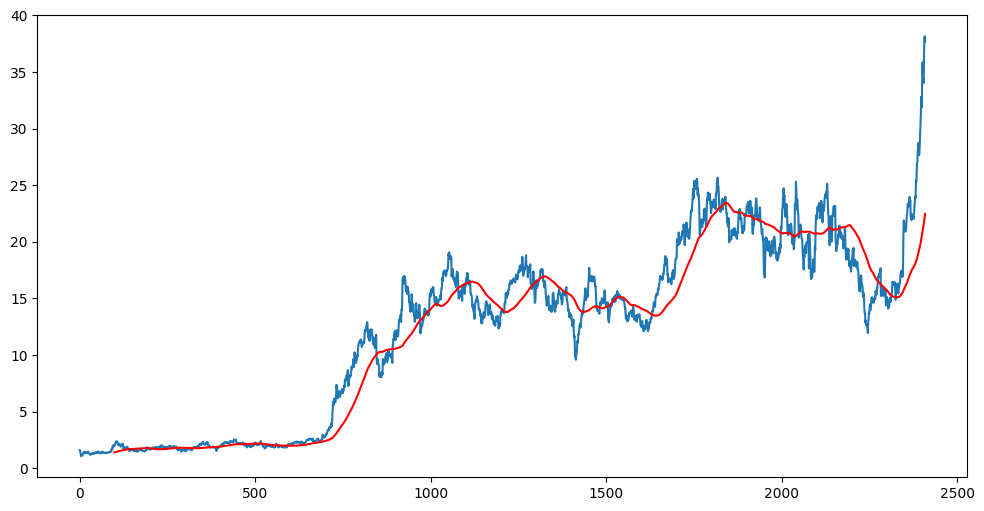

In [13]:
plt.figure(figsize = (12,6))
plt.plot(tickerDf.Close)
plt.plot(ma100, 'r')

In [88]:
ma200 = tickerDf.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2527    54.952067
2528    55.101992
2529    55.251713
2530    55.399561
2531    55.547010
Name: Close, Length: 2532, dtype: float64

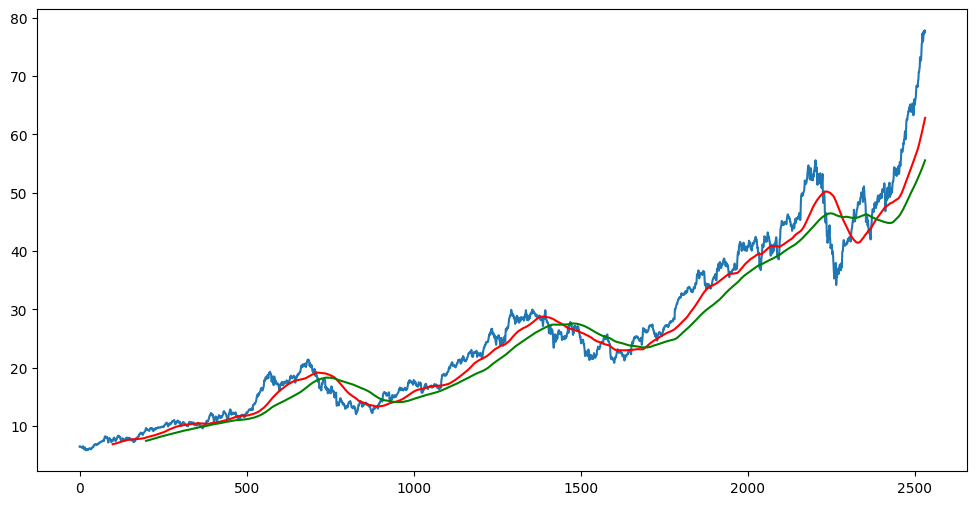

In [89]:
plt.figure(figsize = (12,6))
plt.plot(tickerDf.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [90]:
tickerDf.shape

(2532, 5)

In [91]:
# Splitting data into Training part and Testing part

data_training = pd.DataFrame(tickerDf['Close'][0:int(len(tickerDf)*0.70)])
data_testing = pd.DataFrame(tickerDf['Close'][int(len(tickerDf)*0.70): int(len(tickerDf))])

print(data_training.shape)
print(data_testing.shape)

(1772, 1)
(760, 1)


In [92]:
data_training.head()


,Close
0,6.487533
1,6.498751
2,6.395380
3,6.383556
4,6.425996


In [93]:
data_testing.head()


,Close
1772,27.953901
1773,27.904987
1774,27.956238
1775,27.974876
1776,27.949247


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [95]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0276    ],
       [0.02806511],
       [0.0237793 ],
       ...,
       [0.91045283],
       [0.90842445],
       [0.91769703]])

In [96]:
X_train=[]
Y_train=[]

In [97]:
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    Y_train.append(data_training_array[i:0])
X_train,Y_train=np.array(X_train), np.array(Y_train)

In [98]:
X_train.shape


(1672, 100, 1)

In [99]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D,LSTM

In [100]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dropout(0,2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
Total params: 10400 (40.62 KB)
Trainable params: 10400 (40.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [101]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dropout(0,2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_16 (Dropout)        (None, 50)                0         
                                                                 
Total params: 10400 (40.62 KB)
Trainable params: 10400 (40.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [102]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dropout(0,2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
Total params: 10400 (40.62 KB)
Trainable params: 10400 (40.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [1]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

NameError: name 'model' is not defined